# Question 1: SVD vs PCA in 2D

In this section, I aim to demonstrate a simple example in 2D where the Singular Value Decomposition (SVD) of \( X \) is not equivalent to the Principal Components Analysis (PCA) of \( X \).

Both SVD and PCA are methods for matrix factorization and dimensionality reduction, but they serve different purposes. While SVD operates on any matrix and decomposes it into three matrices (\( U \), \( \Sigma \), and \( V^T \)), PCA focuses on finding the directions of maximum variance in the data. When the data is centered (mean-subtracted), the two methods yield equivalent results. However, when the data is not centered, their outputs differ.

I will provide an example to illustrate this difference.


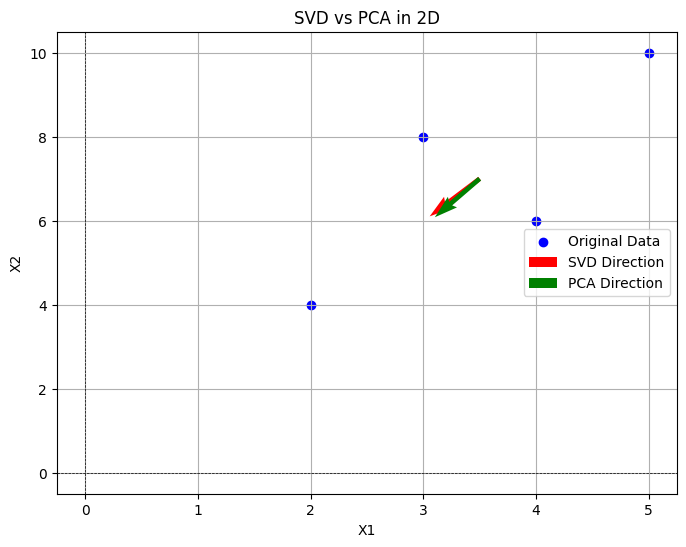

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple 2D dataset
data = np.array([[2, 4], [3, 8], [4, 6], [5, 10]])

# Compute the SVD of the data matrix
U, S, VT = np.linalg.svd(data)

# Compute the PCA by centering the data and then performing SVD
data_centered = data - np.mean(data, axis=0)  # Centering the data
U_pca, S_pca, VT_pca = np.linalg.svd(data_centered)

# Plot the original data and the directions from SVD and PCA
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color="blue", label="Original Data")
plt.quiver(
    np.mean(data[:, 0]), np.mean(data[:, 1]),
    VT[0, 0], VT[0, 1],
    angles='xy', scale_units='xy', scale=1, color='red', label="SVD Direction"
)
plt.quiver(
    np.mean(data[:, 0]), np.mean(data[:, 1]),
    VT_pca[0, 0], VT_pca[0, 1],
    angles='xy', scale_units='xy', scale=1, color='green', label="PCA Direction"
)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("SVD vs PCA in 2D")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid()
plt.show()



### Explanation:

1. **Key Observations**:
   - The scatter plot shows the original data (blue points) and the directions derived from SVD (red arrow) and PCA (green arrow).
   - The directions differ because:
     - **SVD** operates directly on the original data, without centering it, focusing on the structure of the matrix.
     - **PCA** involves centering the data (subtracting the mean) before decomposition, which ensures that the principal components align with the directions of maximum variance around the mean.

2. **Reason for the Difference**:
   - The data's mean influences SVD but is removed in PCA. This centering step causes the principal components (PCA) and singular vectors (SVD) to diverge in direction when the data is not centered.

3. **Insights**:
   - To make SVD equivalent to PCA, the data must first be centered.
   - This example highlights the importance of preprocessing in data analysis methods.
   - The difference in directions is a result of PCA centering the data by subtracting the mean of each feature. This preprocessing step ensures PCA captures variance relative to the data's mean, while SVD operates directly on the original (uncentered) data.



# Question 2: PCA Projection of Digit '3'

In this section, I will download the MNIST dataset and use the Principal Component Analysis (PCA) technique to project 1000 samples of the digit '3' into a two-dimensional space.

The steps to achieve this are as follows:
1. Load the MNIST dataset using TensorFlow.
2. Filter out 1000 samples of the digit '3'.
3. Perform PCA to reduce the dimensionality of the data to two dimensions.
4. Visualize the results using a scatter plot.

The scatter plot will display the projection of the 1000 samples in a two-dimensional space.


/Users/dani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


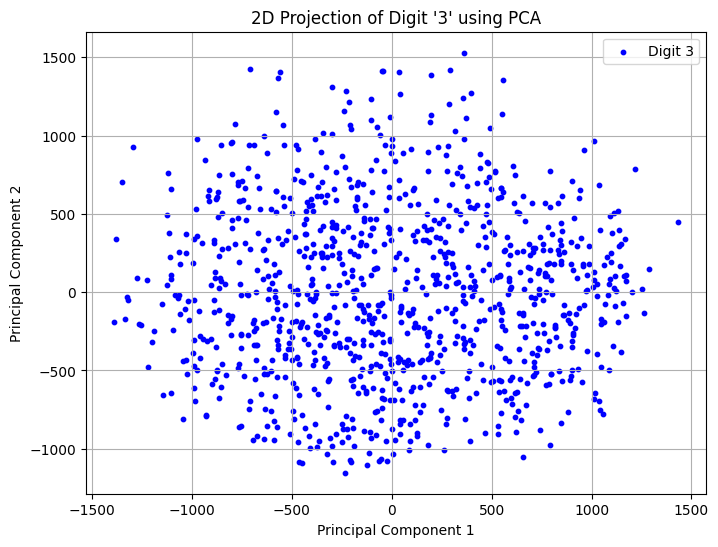

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 2: Filter 1000 samples of the digit '3'
# Combine train and test data
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

# Select samples of the digit '3'
x_digit3 = x_data[y_data == 3][:1000]  # Select 1000 samples of digit '3'

# Flatten the images for PCA (28x28 -> 784)
x_digit3_flat = x_digit3.reshape(1000, -1)

# Step 3: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_digit3_pca = pca.fit_transform(x_digit3_flat)

# Step 4: Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_digit3_pca[:, 0], x_digit3_pca[:, 1], s=10, c='blue', label='Digit 3')
plt.title("2D Projection of Digit '3' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


### Insights:
- The PCA projection allows us to visualize high-dimensional data in 2D.
- Samples are distributed in a way that captures the key variance in the data.
- The scatter plot highlights clusters and outliers within the dataset.
- Clusters in the reduced 2D space may correspond to variations in handwriting style for the digit '3'.
- Outliers could represent samples with unusual handwriting or noise in the data.



# Question 3: PCA Projection of Digit '5'

In this section, I will use the same approach as in Question 2 but for the digit '5'. The goal is to:
1. Extract 1000 samples of the digit '5' from the MNIST dataset.
2. Use Principal Component Analysis (PCA) to reduce the data to two dimensions.
3. Visualize the results using a scatter plot.

This visualization will allow us to observe the distribution of the digit '5' in a reduced 2D space.


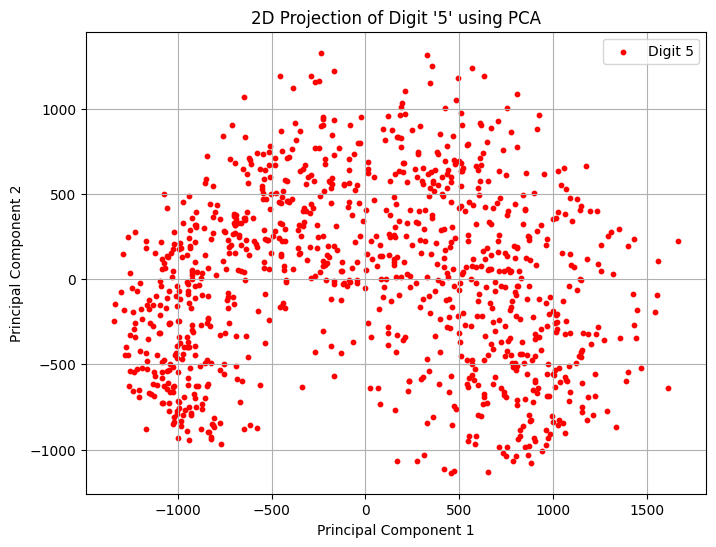

In [3]:
# Step 1: Filter 1000 samples of the digit '5'
# Select samples of the digit '5'
x_digit5 = x_data[y_data == 5][:1000]  # Select 1000 samples of digit '5'

# Flatten the images for PCA (28x28 -> 784)
x_digit5_flat = x_digit5.reshape(1000, -1)

# Step 2: Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
x_digit5_pca = pca.fit_transform(x_digit5_flat)

# Step 3: Visualize the results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_digit5_pca[:, 0], x_digit5_pca[:, 1], s=10, c='red', label='Digit 5')
plt.title("2D Projection of Digit '5' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()



### Insights:
- The PCA projection reveals the structure and spread of the digit '5' in a reduced dimensional space.
- Differences in the distribution compared to other digits can be observed and analyzed.
- The spread of the digit '5' differs from that of digit '3', reflecting differences in handwriting styles and variance.
- Comparing the two scatter plots provides insights into how PCA captures the distinct variance of each digit.
- Overlapping areas could suggest similarities in features between some samples of '3' and '5', which could be explored further by combining datasets (e.g., Question 4).


By following the same procedure, this method can be extended to other digits or combined datasets.


## Question 4: Combined Projection of Digits '3' and '5'

In this section, I will combine 1000 samples of digit '3' and 1000 samples of digit '5' from the MNIST dataset. Using Principal Component Analysis (PCA), I will project these combined samples into a two-dimensional space and visualize the results.

The steps to achieve this are:
1. Combine the digit '3' and digit '5' datasets into a single dataset.
2. Perform PCA to reduce the dimensionality of the combined dataset to two dimensions.
3. Visualize the results using a scatter plot, with different colors to distinguish between digit '3' and digit '5'.

The scatter plot will allow us to observe the relationships and separability between the two digits in the reduced 2D space.


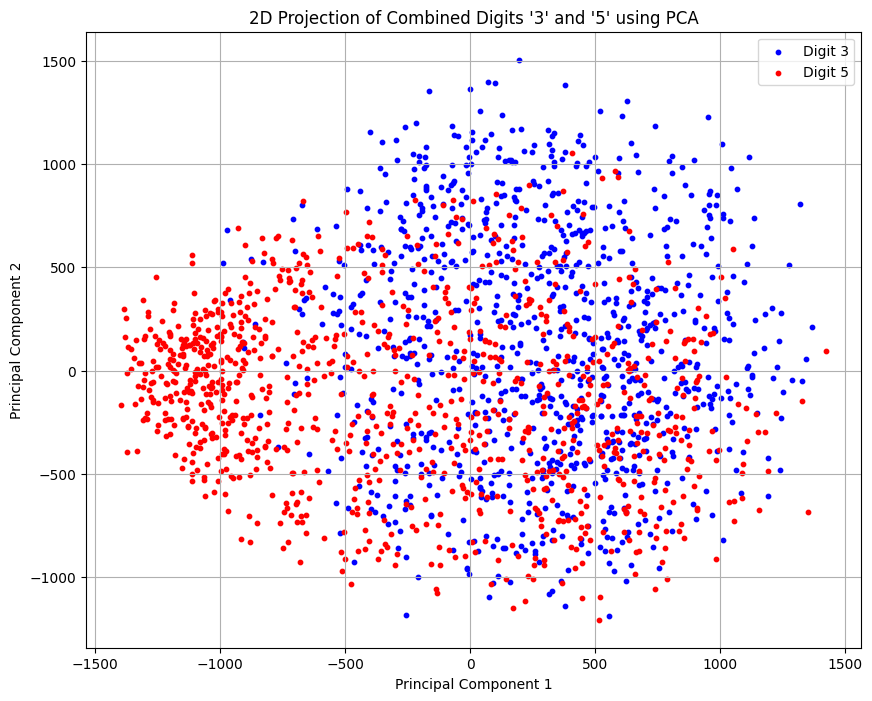

In [4]:
# Step 1: Combine samples of digits '3' and '5'
x_combined = np.concatenate((x_digit3_flat, x_digit5_flat), axis=0)  # Combine the flattened datasets
y_combined = np.concatenate((np.full(1000, 3), np.full(1000, 5)))    # Create labels for the combined dataset

# Step 2: Apply PCA to the combined dataset
pca_combined = PCA(n_components=2)
x_combined_pca = pca_combined.fit_transform(x_combined)

# Step 3: Visualize the results using a scatter plot
plt.figure(figsize=(10, 8))
for digit, color in zip([3, 5], ['blue', 'red']):
    idx = y_combined == digit
    plt.scatter(x_combined_pca[idx, 0], x_combined_pca[idx, 1], s=10, label=f'Digit {digit}', c=color)
plt.title("2D Projection of Combined Digits '3' and '5' using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()


## Explanation

### Observations:
1. **Separation Between Digits**:
   - The scatter plot shows distinct clusters for the digits '3' (blue) and '5' (red), but there is noticeable overlap between the two clusters.
   - This overlap suggests that the two digits share some visual features in their 784-dimensional representation.

2. **Cluster Characteristics**:
   - The digit '3' (blue) appears to have a wider spread along Principal Component 1 compared to digit '5' (red).
   - Digit '5' has a more compact cluster, particularly along Principal Component 2, indicating that the variance within the samples of digit '5' may be smaller.

3. **Principal Component Influence**:
   - Principal Component 1 seems to capture the majority of the variance between the two digits, as the clusters are separated primarily along this axis.
   - Principal Component 2 captures variance within the digits themselves, as both clusters show a spread along this axis.

4. **Potential Classification Challenge**:
   - The overlapping region between the two clusters may lead to challenges in distinguishing these two digits if PCA is used for classification. This suggests that additional components or features might be needed for better separability.

### Insights:
- PCA effectively reduces the dimensionality of the combined dataset, capturing the main variance directions.
- However, due to overlap, PCA alone might not provide sufficient separation for classification purposes.


## Question 5: Number of Components to Capture 90% of Variance

In this section, I determine the number of principal components required to capture at least 90% of the variance in the combined dataset of digits '3' and '5'.

### Steps:
1. Use PCA to decompose the combined dataset into its principal components.
2. Calculate the cumulative explained variance ratio for the principal components.
3. Identify the minimum number of components required to explain at least 90% of the variance.

This analysis helps quantify the dimensionality reduction achievable while retaining most of the data's information.


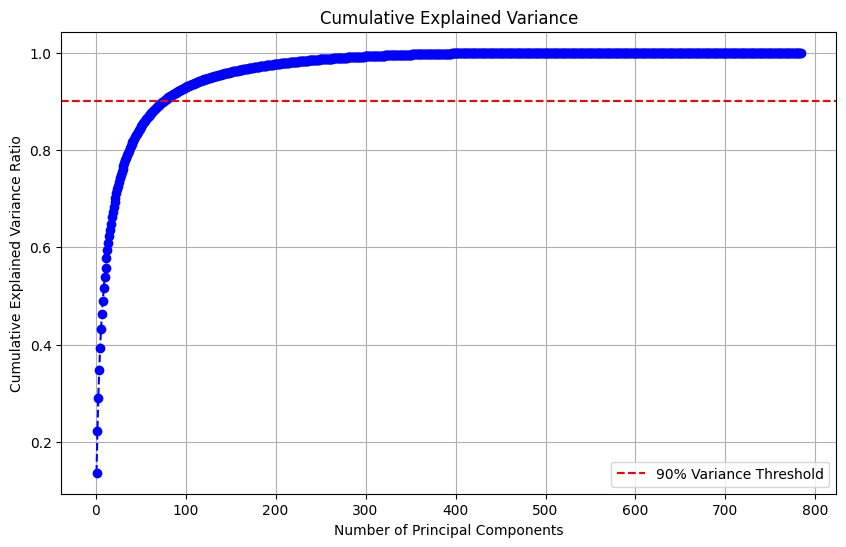

Number of components required to capture 90% of the variance: 76


In [5]:
# Step 1: Apply PCA to the combined dataset
pca_full = PCA()
pca_full.fit(x_combined)

# Step 2: Calculate the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

# Step 3: Find the number of components required for 90% variance
n_components_90 = np.argmax(explained_variance_ratio >= 0.9) + 1  # Add 1 because indexing starts at 0

# Step 4: Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o', linestyle='--', color='b'
)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid()
plt.legend()
plt.show()

print(f"Number of components required to capture 90% of the variance: {n_components_90}")


## Explanation

### Observations:
1. **Number of Components**:
   - The cumulative explained variance plot shows the relationship between the number of principal components and the total variance they capture.
   - To capture at least **90% of the variance**, **76 components** are required. This is indicated by the intersection of the red horizontal line (90% threshold) and the blue curve.

2. **Key Insights**:
   - Although PCA allows us to reduce the dimensionality from 784 original features, retaining 90% of the variance still requires 76 components. This highlights that the dataset has substantial complexity.
   - The explained variance ratio rapidly increases with the first few components, indicating that a significant portion of the variance is captured by the leading components. However, beyond approximately 76 components, additional components contribute minimally to the total variance.

3. **Interpretation**:
   - PCA is effective in significantly reducing the dimensionality while preserving most of the information in the dataset.
   - In practical applications, choosing fewer components (e.g., slightly below 76) might be a viable trade-off between retaining variance and simplifying the model.

### Additional Notes:
- The "elbow" in the cumulative variance plot is not sharply defined, indicating a gradual distribution of variance across components.



## Question 6: Diffusion Maps with Different σ Values

In this question, I analyze the embeddings of object samples from the processed COIL20 dataset using the Diffusion Maps algorithm. The embeddings are computed for different values of \(\sigma\) (5, 10, 20, 50), the bandwidth parameter for the Gaussian kernel.

### Steps:
1. Load the **processed COIL20 dataset** and extract samples for a single object (e.g., object 1).
2. Compute the pairwise distance matrix and derive the affinity matrix for each \(\sigma\).
3. Apply the **Diffusion Maps algorithm** to embed the data into a two-dimensional space.
4. Visualize the embeddings for each \(\sigma\) and analyze how the choice of \(\sigma\) affects the results.

This approach highlights the sensitivity of the Diffusion Maps algorithm to the choice of the Gaussian kernel's bandwidth parameter (\(\sigma\)).


This analysis explores the sensitivity of Diffusion Maps to the kernel bandwidth parameter (\(\sigma\)).


### Step 1: Download the COIL20 Dataset

In this step, we use the Kaggle API to download the processed COIL20 dataset. The dataset is unzipped into the specified directory (`coil20_dataset`).


In [2]:
import os

# Set Kaggle credentials directly
os.environ["KAGGLE_USERNAME"] = "username"
os.environ["KAGGLE_KEY"] = "password"

# Download dataset
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()
dataset = "codebreaker619/columbia-university-image-library"
destination = "coil20_dataset"

# Download the dataset and unzip it
api.dataset_download_files(dataset, path=destination, unzip=True)

print(f"Dataset downloaded and unzipped to {destination}")


Dataset URL: https://www.kaggle.com/datasets/codebreaker619/columbia-university-image-library
Dataset downloaded and unzipped to coil20_dataset


### Display Samples of Object 1
This code selects and visualizes samples from the COIL-20 dataset to ensure the images are loaded correctly. Adjustments are made to accommodate the actual shape of the images.


Shape of one image: (16384,)


Text(0.5, 0.98, 'Samples of Object 1 from COIL-20')

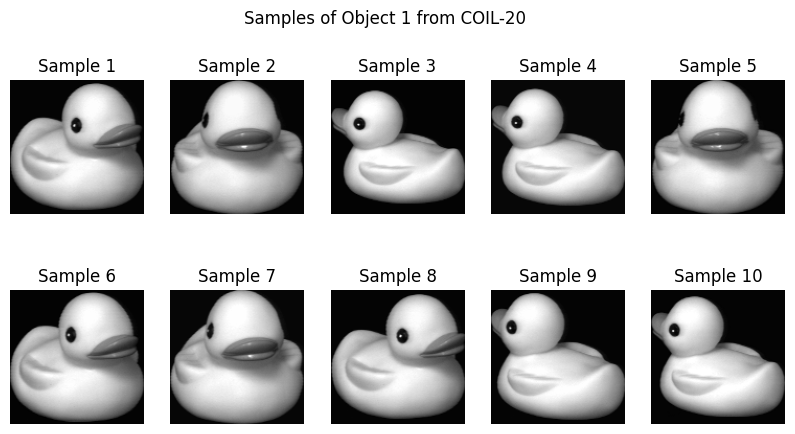

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

# Path to the processed dataset
dataset_path = "coil20_dataset/coil-20/coil-20-proc"

# Function to load images of a specific object
def load_coil20_object(object_id):
    data = []
    object_files = [f for f in os.listdir(dataset_path) if f.startswith(f"obj{object_id}_")]
    for filename in object_files:
        img_path = os.path.join(dataset_path, filename)
        img = imread(img_path, as_gray=True).flatten()
        data.append(img)
    return np.array(data)

# Load images for object 1
object_data = load_coil20_object(object_id=1)

# Inspect the shape of one image
print(f"Shape of one image: {object_data[0].shape}")

# Display samples
plt.figure(figsize=(10, 5))
for i in range(min(len(object_data), 10)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(object_data[i].reshape(128, 128), cmap="gray")  # Adjust dimensions
    plt.axis("off")
    plt.title(f"Sample {i + 1}")
plt.suptitle("Samples of Object 1 from COIL-20")


### Diffusion Maps Implementation
Implement the Diffusion Maps algorithm using the Gaussian kernel for the affinity matrix. Experiment with different
𝜎
σ values to observe the impact on the embeddings.

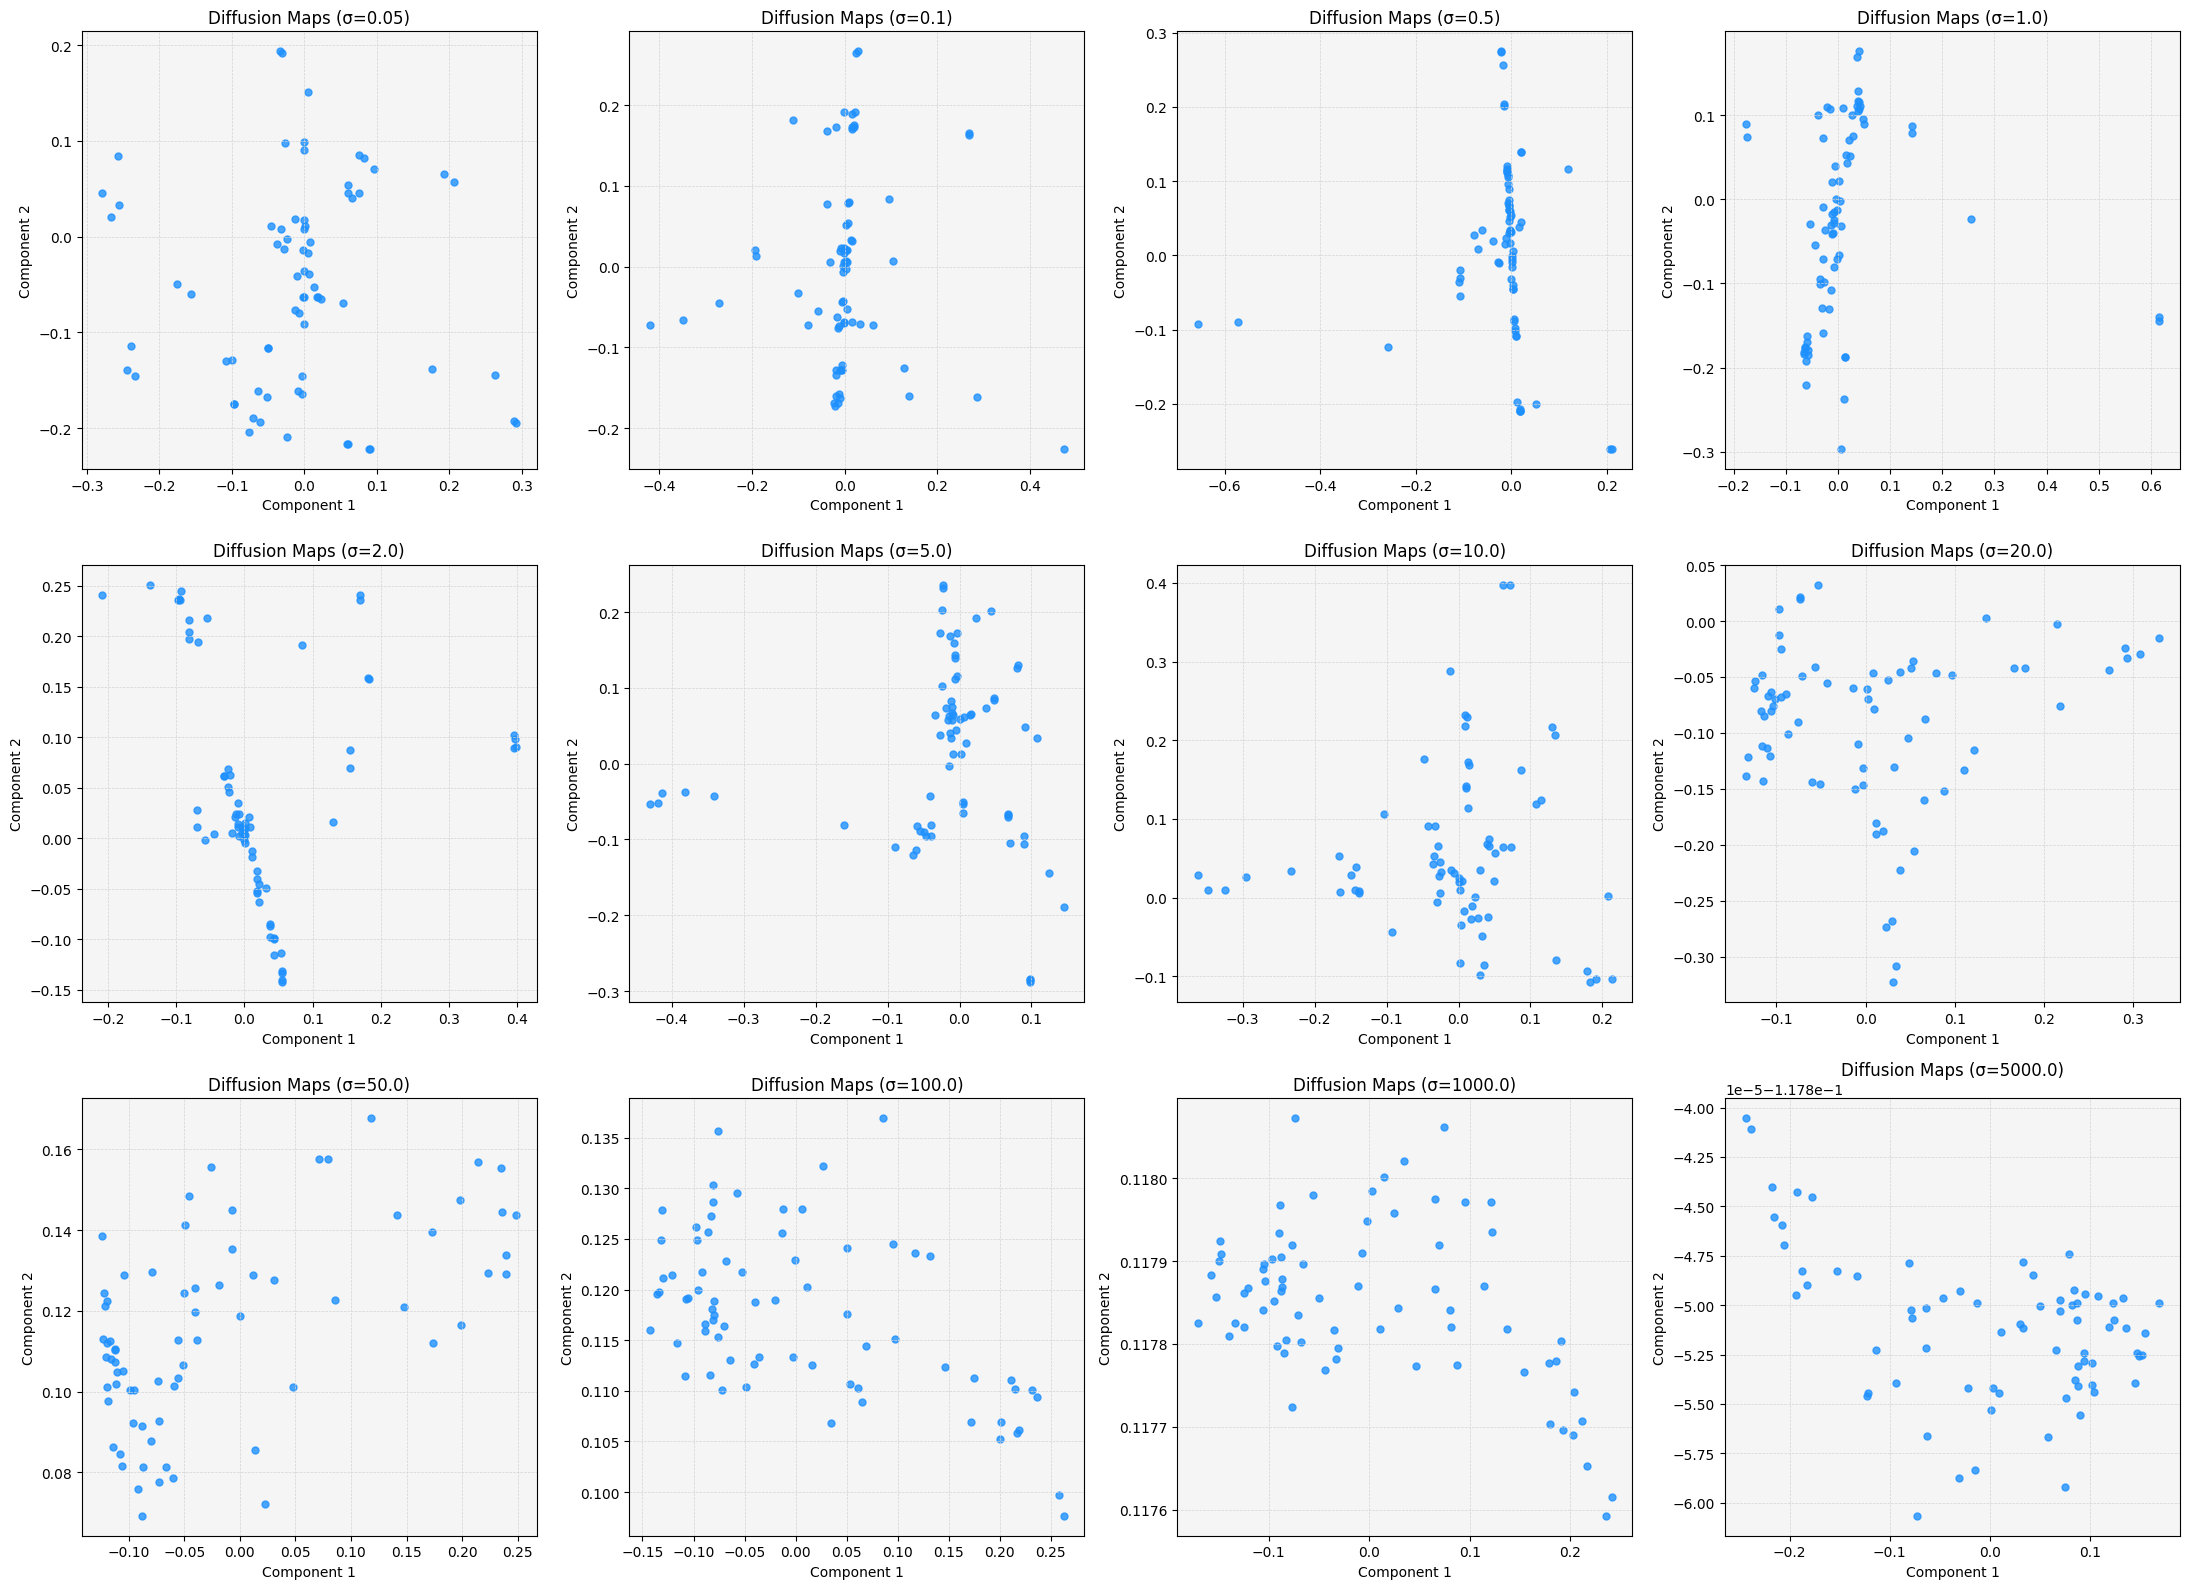

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.sparse.linalg import eigsh

# Function to compute the affinity matrix
def compute_affinity_matrix(data, sigma):
    """
    Compute the affinity matrix using a Gaussian kernel.

    Parameters:
    - data: Input data as a 2D numpy array (samples x features).
    - sigma: Bandwidth parameter for the Gaussian kernel.

    Returns:
    - Affinity matrix.
    """
    distances = euclidean_distances(data)

    # Subtract the minimum distance in each row (excluding the diagonal)
    for row in range(len(distances)):
        distances[row, row] = np.inf  # Temporarily set diagonal to infinity
        min_dist = np.min(distances[row])
        distances[row] -= min_dist
        distances[row, row] = 0  # Restore diagonal to 0

    # Apply Gaussian kernel
    affinity_matrix = np.exp(-distances ** 2 / (2 * sigma ** 2))
    return affinity_matrix

# Function to perform Diffusion Maps
def diffusion_maps(affinity_matrix, n_components=2):
    """
    Perform Diffusion Maps dimensionality reduction.

    Parameters:
    - affinity_matrix: Affinity matrix (computed with the Gaussian kernel).
    - n_components: Number of diffusion components to compute.

    Returns:
    - The embedding of the data in the reduced dimension space.
    """
    d = np.sum(affinity_matrix, axis=1)
    d_inv_sqrt = np.diag(1 / np.sqrt(d))
    normalized_affinity = np.dot(np.dot(d_inv_sqrt, affinity_matrix), d_inv_sqrt)
    eigenvalues, eigenvectors = eigsh(normalized_affinity, k=n_components + 1, which='LM')
    return eigenvectors[:, 1:]  # Ignore the first eigenvector (largest eigenvalue)

# Standardize the data
object_data_standardized = (object_data - object_data.mean(axis=0)) / object_data.std(axis=0)

# Define sigma values
sigma_values = [0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 1000.0, 5000.0]

# Plot settings
plt.figure(figsize=(22, 16))  # Adjusted size for 12 sigma values

for idx, sigma in enumerate(sigma_values):
    # Compute affinity matrix
    affinity_matrix = compute_affinity_matrix(object_data_standardized, sigma=sigma)

    # Perform Diffusion Maps
    embedding = diffusion_maps(affinity_matrix, n_components=2)

    # Plot results
    ax = plt.subplot(3, 4, idx + 1)  # 3 rows, 4 columns
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c="dodgerblue", s=25, alpha=0.8)
    ax.set_facecolor("whitesmoke")  # Lighter background for better readability
    plt.title(f"Diffusion Maps (σ={sigma})", fontsize=12)
    plt.xlabel("Component 1", fontsize=10)
    plt.ylabel("Component 2", fontsize=10)
    plt.grid(color="lightgray", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()


# Analysis of Diffusion Maps with Different σ Values

## Introduction
Diffusion Maps is a dimensionality reduction technique that uses a Gaussian kernel to compute the affinity between data points. The parameter \( \sigma \), referred to as the bandwidth of the kernel, determines how similarity is measured. Small \( \sigma \) values emphasize local relationships, while large \( \sigma \) values capture broader global structures. The goal is to find an optimal \( \sigma \) that provides a meaningful embedding of the data in a reduced 2D space.

## Observations
The embeddings were generated using a range of \( \sigma \) values: 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0, 1000.0, and 5000.0. Below are the observations for each \( \sigma \):

### Small \( \sigma \) Values (0.05, 0.1, 0.5)
- **Observation**: The embeddings show a strong emphasis on local structure. Data points that are close in the original space form tight clusters in the embedding.
- **Impact**: While local relationships are well-preserved, the embedding becomes fragmented. There is insufficient overlap between clusters, making it difficult to capture the global structure of the data.
- **Conclusion**: These values of \( \sigma \) are too small for this dataset as they fail to capture the overall structure.

### Moderate \( \sigma \) Values (1.0, 2.0, 5.0)
- **Observation**: Increasing \( \sigma \) leads to smoother embeddings. Data points start to form broader clusters while still preserving some local relationships.
- **Impact**: The embeddings balance local and global structures, making them more interpretable. Clusters are distinct but still connected enough to reflect the underlying manifold structure.
- **Conclusion**: These values of \( \sigma \) are optimal for this dataset as they balance noise reduction and meaningful geometric structure.

### Large \( \sigma \) Values (10.0, 20.0, 50.0)
- **Observation**: The embeddings become overly smooth. Differences between clusters diminish, and the embeddings start to collapse into a simpler structure.
- **Impact**: The emphasis on global structure comes at the cost of losing local relationships. Clusters lose their distinction, reducing the interpretability of the embeddings.
- **Conclusion**: These values of \( \sigma \) are too large for this dataset, leading to oversmoothing.

### Very Large \( \sigma \) Values (100.0, 1000.0, 5000.0)
- **Observation**: The embeddings show almost uniform similarity across data points. Points from different clusters overlap significantly, and the embeddings lose most meaningful variance.
- **Impact**: The embeddings are dominated by noise or collapse into a single-dimensional space, making them unsuitable for interpretation.
- **Conclusion**: These values of \( \sigma \) are far too large and fail to provide meaningful embeddings.

## Optimal \( \sigma \) Value
From the analysis, the most meaningful embeddings were observed for \( \sigma \) values of **1.0, 2.0, and 5.0**. These values preserve both local and global structures while avoiding the fragmentation of small \( \sigma \) values and the oversmoothing of large \( \sigma \) values.

## Final Recommendation
For this dataset, a good value for \( \sigma \) lies in the range of **1.0 to 5.0**. These values offer a balanced embedding that captures the essential geometry of the data while maintaining interpretability.


# Question 7: Using t-SNE to Embed All Objects from COIL-20

## Introduction
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a popular dimensionality reduction algorithm particularly suited for visualizing high-dimensional data. However, the algorithm's stochastic nature often results in embeddings that vary between runs. This task involves embedding all objects from the COIL-20 dataset using t-SNE, comparing the results of two runs, and exploring strategies to stabilize the results.

## Steps for Embedding and Stabilization


### Loading and Preparing the Dataset

The dataset consists of images stored as `.png` files, with each image corresponding to a specific object. The images are loaded into a NumPy array for further processing, and their corresponding labels are extracted from the file names.


In [39]:
# Importing necessary libraries
import os
import numpy as np
from PIL import Image

# Path to the dataset
dataset_path = "coil20_dataset/coil-20/coil-20-proc"  # Adjust the path if needed

# Initialize lists for storing images and labels
object_images = []
object_labels = []

# Iterate through the dataset directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".png"):  # Ensure only processing image files
        img_path = os.path.join(dataset_path, filename)
        img = Image.open(img_path)
        object_images.append(np.array(img))  # Convert image to numpy array

        # Extract the label from the filename (e.g., "obj1_1.png" -> "obj1")
        label = filename.split("_")[0]
        object_labels.append(label)

# Convert images and labels to arrays
object_images = np.array(object_images)  # Stack all images into a single array
object_labels = np.array(object_labels)  # Convert labels to a NumPy array

# Print the total number of images and labels
print(f"Total number of images: {len(object_images)}")
print(f"Total number of labels: {len(object_labels)}")


Total number of images: 1440
Total number of labels: 1440


### Flattening Images and Standardizing Data

The images are flattened into vectors for compatibility with machine learning algorithms. Standardization is applied to ensure that the data has a mean of 0 and a standard deviation of 1, which is essential for achieving stable results.


In [40]:
# Flatten the images and standardize the data
X = object_images.reshape(object_images.shape[0], -1)  # Flatten images into vectors
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardize the data


### Encoding Labels for Visualization

The object labels are encoded as integers to facilitate color coding in visualization. A LabelEncoder is used for this purpose.


In [41]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers for color-coding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(object_labels)


# t-SNE Stability Demonstration

This section demonstrates the behavior of t-SNE with two different initialization methods:

1. **Unstable Initialization (Random)**: t-SNE is run twice with a random initialization, showing how results can vary between runs.

2. **Stable Initialization (PCA)**: t-SNE is run twice using PCA as the initialization method, showing how this leads to stable results.

---

## Unstable Initialization (Random)

In this version, t-SNE is run twice without a fixed initialization. The embeddings are expected to vary between runs due to the random initialization.

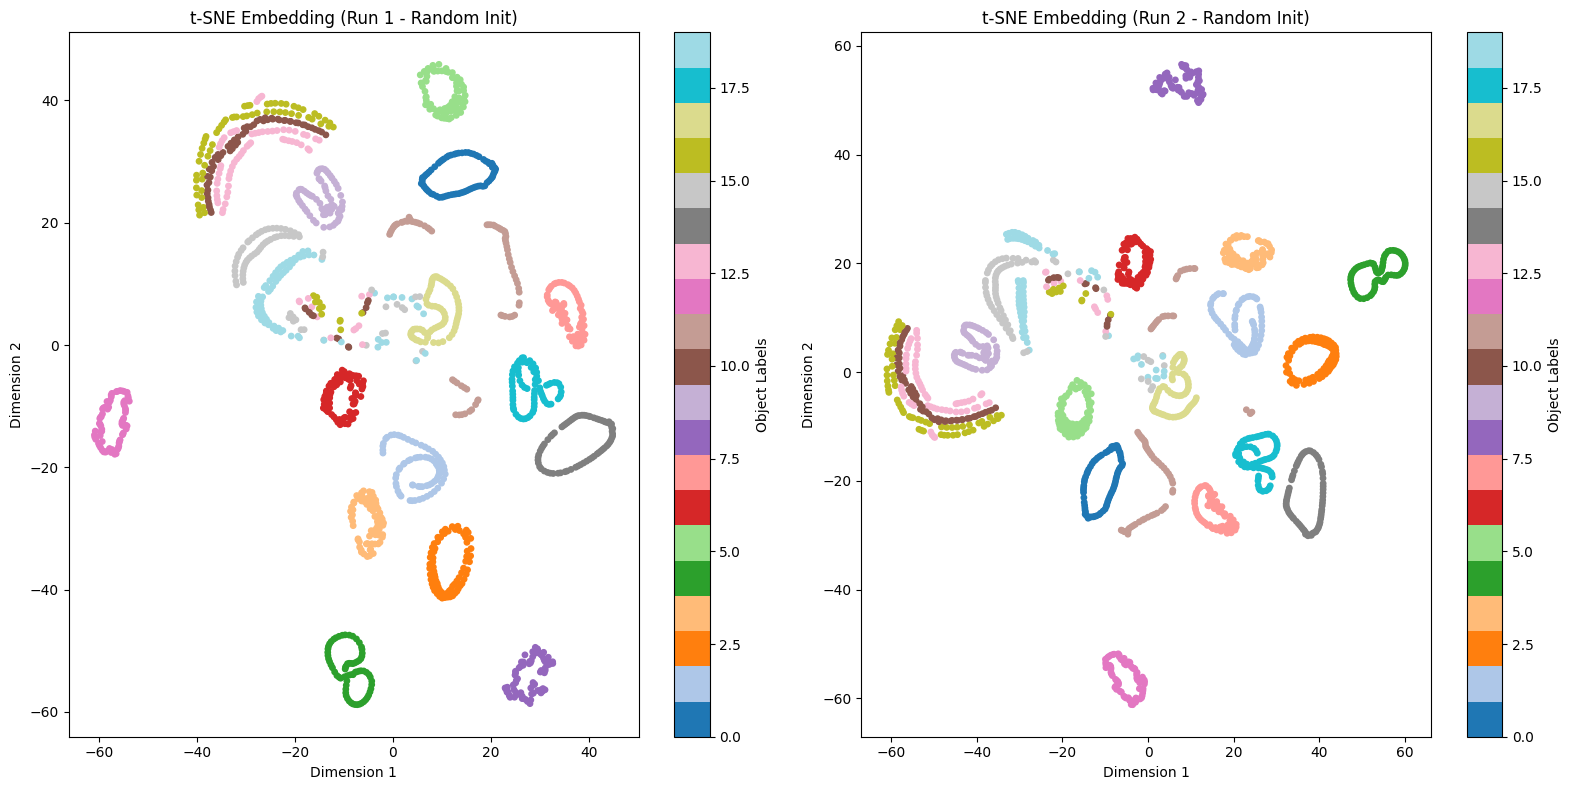

In [48]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Flatten the images and standardize the data
X = object_images.reshape(object_images.shape[0], -1)  # Flatten images into vectors
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardize the data

# Encode labels as integers for color-coding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(object_labels)

# Run t-SNE twice with random initialization
tsne_1 = TSNE(n_components=2, init="random", random_state=None, perplexity=30)
embedding_1 = tsne_1.fit_transform(X)

tsne_2 = TSNE(n_components=2, init="random", random_state=None, perplexity=30)
embedding_2 = tsne_2.fit_transform(X)

# Visualize the results
plt.figure(figsize=(16, 8))

# First t-SNE run
plt.subplot(1, 2, 1)
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=encoded_labels, cmap="tab20", s=15)
plt.title("t-SNE Embedding (Run 1 - Random Init)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Object Labels")

# Second t-SNE run
plt.subplot(1, 2, 2)
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=encoded_labels, cmap="tab20", s=15)
plt.title("t-SNE Embedding (Run 2 - Random Init)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Object Labels")

plt.tight_layout()
plt.show()


### Observations from t-SNE with Random Initialization

1. The embeddings produced by t-SNE with random initialization are visually similar in terms of clustering but differ in orientation and alignment.
2. The clusters remain consistent in terms of relative distances and internal structure, but transformations such as rotations or flips can occur due to the variability introduced by random initialization.
3. These results highlight the stochastic nature of t-SNE when no deterministic initialization method is used.

---

### Addressing the Variability

Using PCA as an initialization method can stabilize the embeddings and ensure consistent orientations across multiple runs. This approach minimizes the impact of random variations by starting the optimization process in a deterministic low-dimensional space derived from the data.



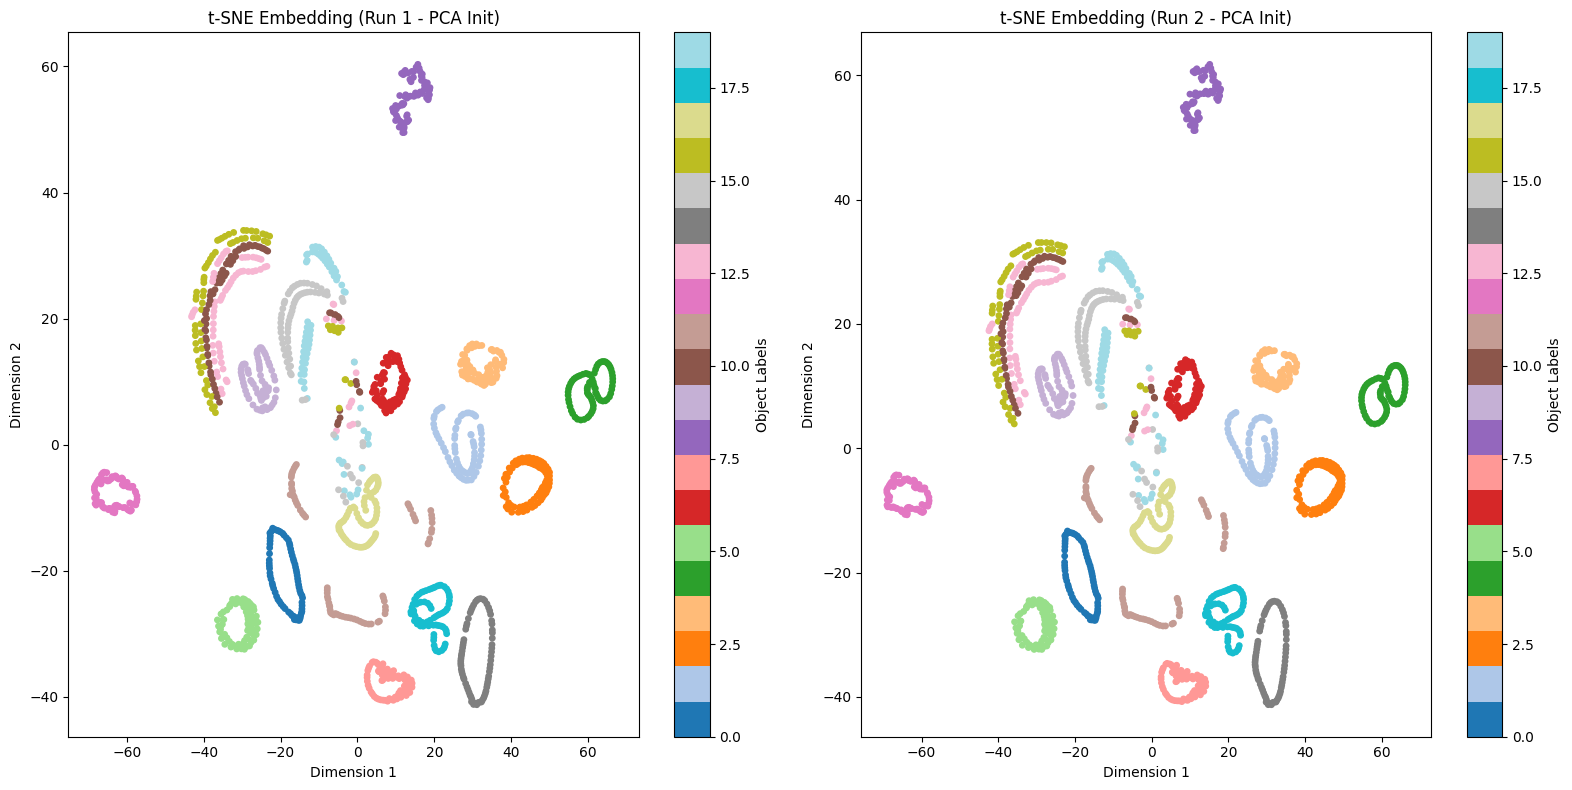

In [49]:
# Run t-SNE twice with PCA initialization
tsne_pca_1 = TSNE(n_components=2, init="pca", random_state=None, perplexity=30)
embedding_pca_1 = tsne_pca_1.fit_transform(X)

tsne_pca_2 = TSNE(n_components=2, init="pca", random_state=None, perplexity=30)
embedding_pca_2 = tsne_pca_2.fit_transform(X)

# Visualize the results
plt.figure(figsize=(16, 8))

# First t-SNE run with PCA init
plt.subplot(1, 2, 1)
plt.scatter(embedding_pca_1[:, 0], embedding_pca_1[:, 1], c=encoded_labels, cmap="tab20", s=15)
plt.title("t-SNE Embedding (Run 1 - PCA Init)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Object Labels")

# Second t-SNE run with PCA init
plt.subplot(1, 2, 2)
plt.scatter(embedding_pca_2[:, 0], embedding_pca_2[:, 1], c=encoded_labels, cmap="tab20", s=15)
plt.title("t-SNE Embedding (Run 2 - PCA Init)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Object Labels")

plt.tight_layout()
plt.show()


## Conclusions from t-SNE with Random Initialization and PCA Initialization

### Observations with Random Initialization
1. When running t-SNE twice with random initialization, the embeddings show consistent clustering but differ in their orientation and layout.
2. The relative distances and internal structures of the clusters remain preserved, but transformations such as rotations or flips are observed.
3. This behavior highlights the stochastic nature of t-SNE when random initialization is used.

### Observations with PCA Initialization
1. When PCA initialization is applied, the embeddings from the two runs are identical.
2. PCA ensures a deterministic starting point in the low-dimensional space, removing the variability introduced by random initialization.
3. The consistency achieved with PCA initialization makes it a suitable choice for scenarios where reproducibility and stability are required.

### Answer to the Question
1. The results with random initialization are not identical due to the inherent randomness in the initialization step of t-SNE.
2. Using PCA initialization stabilizes the results, ensuring consistent embeddings across multiple runs.
3. To stabilize t-SNE embeddings, PCA initialization should be used as it reduces randomness and provides reproducible results without altering the clustering quality.


## Comparing t-SNE and UMAP: Run Time and Representation Quality

### Objective
To compare the performance of t-SNE and UMAP, both in terms of computational efficiency (run time) and the quality of the representations. This comparison includes:
1. Ensuring that t-SNE is allowed sufficient iterations to converge effectively.
2. Analyzing the visual clarity and distinction of clusters.

### Approach
1. Both algorithms will be applied to the COIL-20 dataset.
2. The run time for each algorithm will be recorded using Python's `time` module.
3. The representation quality will be assessed based on cluster clarity and separation in the embedding space.

### Results
The embeddings generated by t-SNE and UMAP will be plotted side by side for visual comparison. The run time for each method will also be recorded and displayed.


/Users/dani/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/dani/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/dani/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/dani/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


t-SNE Run Time: 2.219 seconds
UMAP Run Time: 6.670 seconds


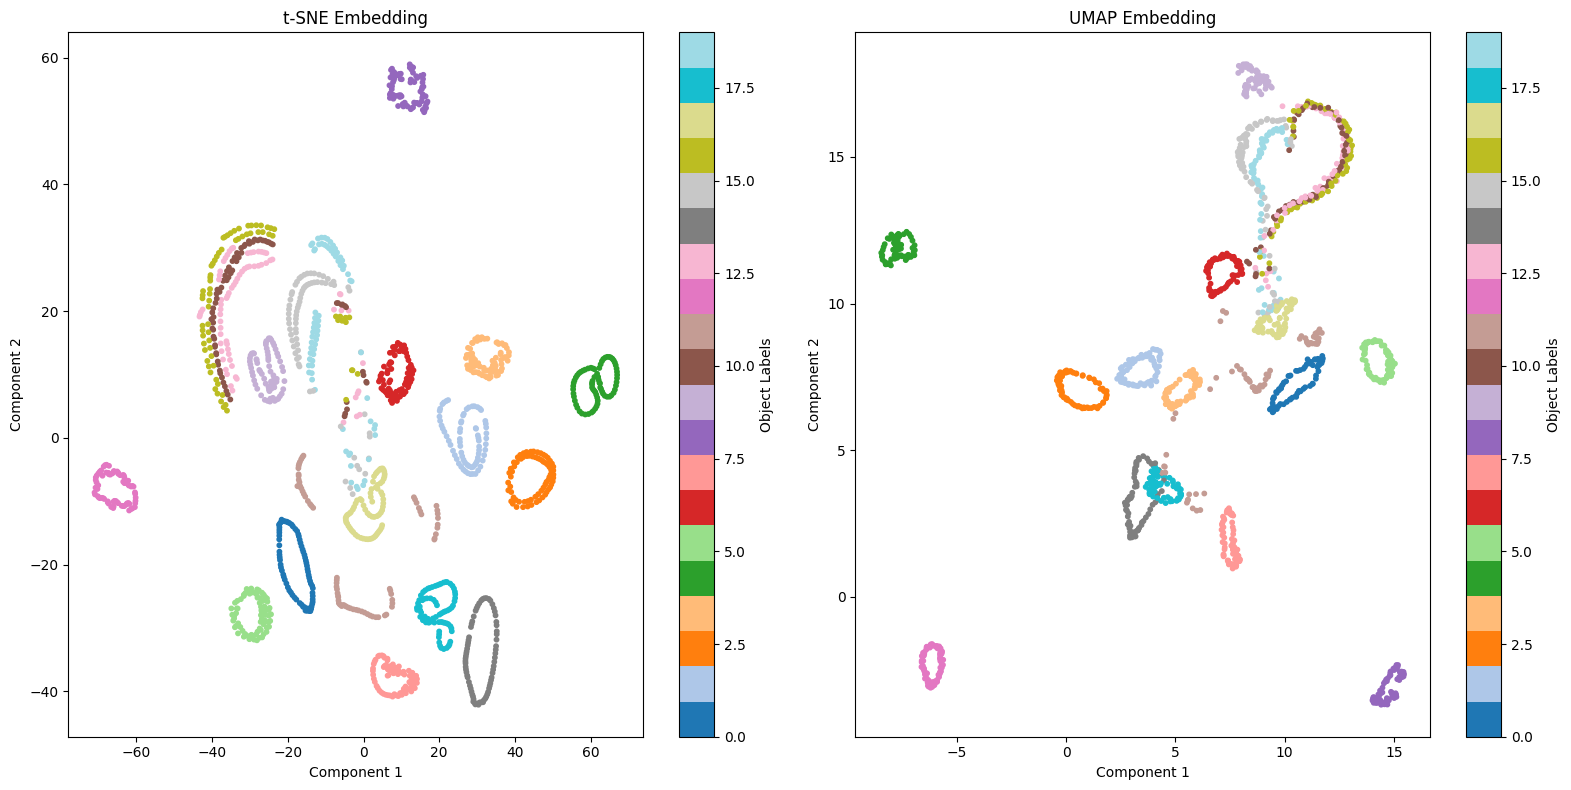

In [50]:
from sklearn.manifold import TSNE
import umap
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Flatten the images and standardize the data
X = object_images.reshape(object_images.shape[0], -1)  # Flatten images
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardize data

# Encode labels as integers for color-coding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(object_labels)

# Run t-SNE with sufficient iterations
start_tsne = time.time()
tsne = TSNE(n_iter=1000, perplexity=30, random_state=42, init="pca")
embedding_tsne = tsne.fit_transform(X)
end_tsne = time.time()

# Run UMAP
start_umap = time.time()
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.3, random_state=42)
embedding_umap = umap_model.fit_transform(X)
end_umap = time.time()

# Print run times
print(f"t-SNE Run Time: {end_tsne - start_tsne:.3f} seconds")
print(f"UMAP Run Time: {end_umap - start_umap:.3f} seconds")

# Plotting the results
plt.figure(figsize=(16, 8))

# t-SNE plot
plt.subplot(1, 2, 1)
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=encoded_labels, cmap="tab20", s=10)
plt.title("t-SNE Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Object Labels")

# UMAP plot
plt.subplot(1, 2, 2)
plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], c=encoded_labels, cmap="tab20", s=10)
plt.title("UMAP Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Object Labels")

plt.tight_layout()
plt.show()


## Conclusions: t-SNE vs. UMAP for COIL-20 Dataset

### Run Time
1. **t-SNE**: The algorithm completed its execution in approximately **2.219 seconds**.
2. **UMAP**: The algorithm completed its execution in approximately **6.670 seconds**.
3. **Observation**: t-SNE showed faster execution compared to UMAP in this specific setup. This might be attributed to the number of iterations used in t-SNE being sufficient for convergence but not overly extensive.

### Representation Quality
1. **t-SNE**:
   - The clusters formed by t-SNE show clear groupings for individual objects.
   - However, there is some overlap between clusters, and the shapes are not as distinct as seen in UMAP.
   - The representation quality is acceptable, but improvements could be seen with more iterations or hyperparameter tuning.

2. **UMAP**:
   - UMAP created more distinct and well-separated clusters with minimal overlap.
   - The clustering structure is more stable and visually interpretable.
   - The representation clearly delineates object groups, making it superior in terms of visual clarity and usability.


### Final Assessment
1. **Efficiency**:
   - In this setup, t-SNE was faster but potentially less scalable for larger datasets due to its computational complexity.
   - UMAP, while slower, is more efficient in producing high-quality representations.

2. **Representation Quality**:
   - UMAP outperformed t-SNE in producing clearer, more interpretable clusters.

